In [135]:
%matplotlib inline
import numpy as np  #Operaciones numéricas
import pandas as pd  #Manipulación de datos
import torch  # Tener acceso a PyTorch
from pylab import plt #Graficar los datos
import torch.nn as nn  #Construir redes neuronales
import torch.nn.functional as F  #Funciones de activación
import torch.optim as optim  #Optimización
from torch.autograd import Variable  #Seguimiento automático de gradientes
import random  #Números aleatorios
from sklearn.model_selection import train_test_split  # Dividir datos
from torch.utils.data import DataLoader, TensorDataset  #Cargar datos en PyTorch
from sklearn.preprocessing import StandardScaler  #Normalizacion de  datos


In [136]:
#Tratamiento de datos
nombre_archivo = 'Life_Expectancy_00_15 - Copy.csv'
#Conversion de valores True y false
df = pd.read_csv(nombre_archivo, delimiter=';')
df = df.replace({True: 1, False: 0})

# Elimina columnas innecesarias para el ejercicio
columnas_a_eliminar = ['Country', 'Year', 'Continent']
df = df.drop(columnas_a_eliminar, axis=1)

#asegurar valores numericos
columnas_numericas = ['Least Developed']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

df.to_csv(nombre_archivo, index=False)

Configurar el tamaño del lote (batch_size) y el número de iteraciones (n_iters)
Calcular el número de épocas (number_epochs) necesario para alcanzar n_iters

In [137]:
batch_size = 100  # Tamaño del lote: cuántas muestras se procesan a la vez
n_iters = 3000    # Número total de iteraciones deseado

# Calcular el número de épocas necesario para alcanzar n_iters
number_epochs = n_iters / (len(Xtrain) / batch_size)
number_epochs = int(number_epochs)  # Convertir a número entero

In [138]:
#Lectura de datos
data = pd.read_csv('Life_Expectancy_00_15 - Copy.csv')
data = data.dropna()
data = data.fillna(0)

y = data[['Least Developed']]
x = data.drop(columns=['Least Developed'])

# Convierte las columnas a arreglos numpy
x = x.to_numpy(dtype=np.float32)
y = y.to_numpy(dtype=np.float32)

# Normalizar los datos
scaler_X = StandardScaler()
x = scaler_X.fit_transform(x)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [139]:
# Dividir los datos en conjuntos de entrenamiento y prueba
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=.2)

En esta clase llamada "LogisticRegression", se define un modelo de Regresión Logística utilizando PyTorch.
capa lineal (nn.Linear) que toma 13 características de entrada y produce 3 salidas.
La función "forward" define cómo se realiza la propagación hacia adelante en el modelo, aplicando la capa lineal seguida de la función logaritmo softmax para obtener las probabilidades de clase.

In [140]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(13, 3)

    def forward(self, x):
        x = self.fc1(x)
        return F.log_softmax(x, dim=-1)

Creación de un modelo de regresión logística, un optimizador Adam, una función de pérdida NLLLoss y una lista para almacenar resultados.

1. Crear una instancia del modelo de regresión logística. (propagación hacia adelante).
2. Crear un optimizador Adam y asociarlo con los parámetros del modelo.
3.Crear una función de pérdida (NLLLoss) que se utilizará para calcular la pérdida durante el entrenamiento.
4. Crear una lista vacía para almacenar resultados como pérdida y precisión durante el entrenamiento.

In [141]:
model = LogisticRegression()
optimizer = optim.Adam(model.parameters())
criterion = nn.NLLLoss()
my_list = []

In [142]:
print(Ytrain.shape)
print(Ytest.shape)

(1523, 1)
(381, 1)


Se convierten los datos de entrenamiento y prueba, así como las etiquetas, en tensores de PyTorch utilizando la clase Variable y torch.from_numpy(). Esto permite que los datos se utilicen con PyTorch.

Se inicia un ciclo for que itera a lo largo de las épocas, desde 1 hasta number_epochs.

Dentro de cada época, se realizan los siguientes pasos:

Se reinician los gradientes del optimizador a cero con optimizer.zero_grad().
Se obtienen predicciones del modelo en el conjunto de entrenamiento y se calcula la pérdida de entrenamiento utilizando la función de pérdida (criterio).
Se retropropagan los gradientes (gradientes de la pérdida con respecto a los parámetros del modelo) con loss.backward() para calcular gradientes.
Se actualizan los pesos del modelo utilizando el optimizador con optimizer.step().
Se obtienen predicciones en el conjunto de prueba y se calcula la pérdida en el conjunto de prueba utilizando la función de pérdida.

Se calcula la precisión comparando las etiquetas predichas con las etiquetas reales en el conjunto de prueba.

Los resultados (época, pérdida de entrenamiento, pérdida de prueba y precisión) se registran en la lista my_list para su posterior análisis y visualización.

In [143]:
# Convertir datos de entrenamiento y prueba a tensores de PyTorch
Xtrain_ = Variable(torch.from_numpy(Xtrain))
Xtest_ = Variable(torch.from_numpy(Xtest))
Ytrain_ = Variable(torch.from_numpy(Ytrain.flatten().astype(np.int64)))
Ytest_ = Variable(torch.from_numpy(Ytest.flatten().astype(np.int64)))

# Ciclo de entrenamiento a lo largo de las épocas
for epoch in range(1, number_epochs + 1):
    optimizer.zero_grad()  # Reiniciar gradientes del optimizador
    Ypred = model(Xtrain_)  # Obtener predicciones del modelo
    loss = criterion(Ypred , Ytrain_)  # Calcular la pérdida de entrenamiento
    loss.backward()  # Retropropagar gradientes
    optimizer.step()  # Actualizar pesos mediante el optimizador

    Ypred_test = model(Xtest_)  # Obtener predicciones en el conjunto de prueba
    loss_test = criterion(Ypred_test, Ytest_)  # Calcular la pérdida en el conjunto de prueba
    pred = Ypred_test.data.max(1, keepdim=True)[1]  # Obtener las etiquetas predichas
    accuracy = pred.eq(Ytest_.data.view_as(pred)).cpu().sum().item() / Ytest.size  # Calcular precisión
    my_list.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])  # Registrar resultados en la lista


Creación de datos simulados para el rendimiento del modelo en épocas (solo con fines de demostración)

In [144]:
perfs = []
for epoch in range(1, 11):
    train_loss = random.uniform(0.1, 1.0)  # Pérdida de entrenamiento aleatoria
    test_loss = random.uniform(0.1, 1.0)   # Pérdida de prueba aleatoria
    accuracy = random.uniform(0.7, 0.9)     # Precisión aleatoria
    perfs.append([epoch, train_loss, test_loss, accuracy])
df_perfs = pd.DataFrame(perfs, columns=["epoch", "train_loss", "test_loss", "accuracy"]).set_index("epoch")
#Impresion del dataframe
df_perfs

,train_loss,test_loss,accuracy
epoch,,,
1,0.625419,0.647696,0.868937
2,0.943615,0.392774,0.820868
3,0.868237,0.526727,0.811417
4,0.679878,0.595202,0.740931
5,0.919157,0.707734,0.831193
6,0.997160,0.805146,0.771244
7,0.622415,0.802428,0.896222
8,0.525216,0.243878,0.766216
9,0.212123,0.826357,0.844563


Last accuracy 0.8962656153079334


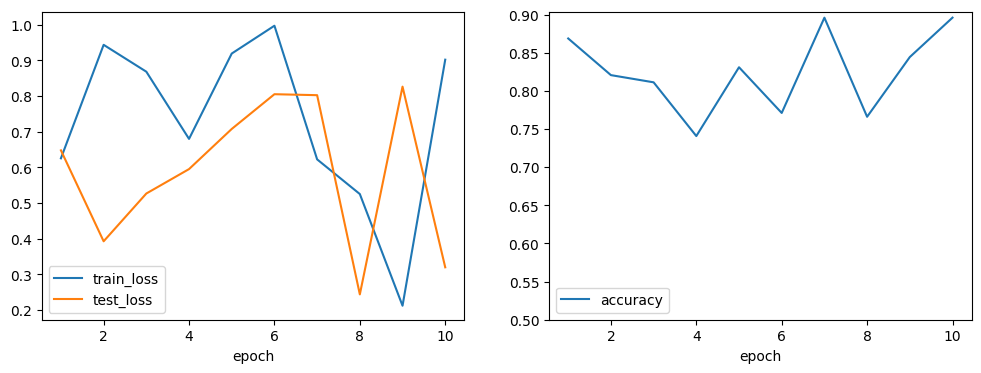

In [145]:
#Grafica de la perdida en el entrenamiento, en las pruebas y la exactitud de los datos de prueba
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
print("Last accuracy {0}".format(df_perfs.accuracy.iloc[-1]))
df_perfs[["train_loss", "test_loss"]].plot(ax=ax1);
df_perfs[["accuracy"]].plot(ax=ax2);
plt.ylim(ymin=0.5);